In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

In [20]:
def plot(file1, file2, file3, outfile, markevery=1, logscale=False):
    with open(file1, 'r') as f:
        iterative_y_list = json.loads(f.read())
    with open(file2, 'r') as f:
        random_y_list = json.loads(f.read())
    with open(file3, 'r') as f:
        filtered_y_list = json.loads(f.read())
    n_intances = iterative_y_list[0][-1]
    ip_y = []
    for plot_data_y in iterative_y_list:
        current = 0
        num_frames_as_y = [0]
        for i, y in enumerate(plot_data_y): 
            if y > current: 
                num_frames_as_y.append(i)
                current = y
        ip_y.append(num_frames_as_y)
    ip_y = np.asarray(ip_y)
    ip_y_upper = np.percentile(ip_y, 75, axis=0)
    ip_y_lower = np.percentile(ip_y, 25, axis=0)
    ip_y_median = np.percentile(ip_y, 50, axis=0)
    ip_x_values = np.arange(ip_y.shape[1]) / n_intances

    rp_y = []
    for plot_data_y in random_y_list:
        current = 0
        num_frames_as_y = [0]
        for i, y in enumerate(plot_data_y): 
            if y > current: 
                num_frames_as_y.append(i)
                current = y
        rp_y.append(num_frames_as_y)
    rp_y = np.asarray(rp_y)
    rp_y_upper = np.percentile(rp_y, 75, axis=0)
    rp_y_lower = np.percentile(rp_y, 25, axis=0)
    rp_y_median = np.percentile(rp_y, 50, axis=0)
    rp_x_values = np.arange(rp_y.shape[1]) / n_intances

    fp_y = []
    for plot_data_y in filtered_y_list:
        current = 0
        num_frames_as_y = [0]
        for i, y in enumerate(plot_data_y): 
            if y > current: 
                num_frames_as_y.append(i)
                current = y
        fp_y.append(num_frames_as_y)
    fp_y = np.asarray(fp_y)
    fp_y_upper = np.percentile(fp_y, 75, axis=0)
    fp_y_lower = np.percentile(fp_y, 25, axis=0)
    fp_y_median = np.percentile(fp_y, 50, axis=0)
    rp_roi_x_values = np.arange(fp_y.shape[1]) / n_intances

    # plot it!
    fig, ax = plt.subplots(1, figsize=(4, 3))

    # Set tick font size
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(10)


    ax.plot(rp_y_median, rp_x_values, label='Random', marker='o', markersize=4, markevery=markevery, color='tab:orange')
    ax.plot(fp_y_median, rp_roi_x_values, label='Filtered', marker='s', markersize=4, markevery=markevery, color='tab:green')
    ax.plot(ip_y_median, ip_x_values, label='VOCAL', marker=6, markersize=4, markevery=markevery, color='tab:blue')
    ax.fill_betweenx(rp_x_values, rp_y_lower, rp_y_upper, facecolor='tab:orange', alpha=0.3)
    ax.fill_betweenx(rp_roi_x_values, fp_y_lower, fp_y_upper, facecolor='tab:green', alpha=0.3)
    ax.fill_betweenx(ip_x_values, ip_y_lower, ip_y_upper, facecolor='tab:blue', alpha=0.3)
    ax.legend(loc='lower right', prop={"size":12})
    ax.set_xlabel('number of frames the user examines', fontsize=12)
    ax.set_ylabel('distinct instances found', fontsize=12)
    if logscale:
        ax.set_xscale('log')
    # plt.xticks(np.arange(0, 1501, 250))
    # plt.xlim(right=1700)
    # ax.grid()
    # ax.set_rasterized(True)
    plt.savefig(outfile, bbox_inches='tight', pad_inches=0)

    print(np.take(ip_y_median, ip_y_median.size // 2), np.take(ip_y_median, -1))
    print(np.take(rp_y_median, rp_y_median.size // 2), np.take(rp_y_median, -1))
    print(np.take(fp_y_median, fp_y_median.size // 2), np.take(fp_y_median, -1))
    # print(rp_y_median[9], rp_y_median[-1])
    # print(fp_y_median[9], fp_y_median[-1])
    print("Finding 50% distinct instances:", np.take(rp_y_median, rp_y_median.size // 2) / np.take(ip_y_median, ip_y_median.size // 2), np.take(fp_y_median, fp_y_median.size // 2) / np.take(ip_y_median, ip_y_median.size // 2))
    print("Finding all distinct instances:", np.take(rp_y_median, -1) / np.take(ip_y_median, -1), np.take(fp_y_median, -1) / np.take(ip_y_median, -1))

31.0 83.0
260.0 1230.5
42.0 339.0
Finding 50% distinct instances: 8.387096774193548 1.3548387096774193
Finding all distinct instances: 14.825301204819278 4.0843373493975905


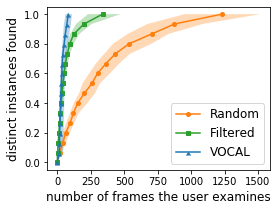

In [21]:
plot('iterative.json', 'random.json', 'filtered.json', "with_heuristic.pdf")

34.0 83.0
301.0 1230.5
51.0 339.0
Finding 60% distinct instances: 8.852941176470589 1.5
Finding all distinct instances: 14.825301204819278 4.0843373493975905


126.0 569.5
272.5 1199.5
50.0 494.5
Finding 50% distinct instances: 2.1626984126984126 0.3968253968253968
Finding all distinct instances: 2.106233538191396 0.8683055311676909


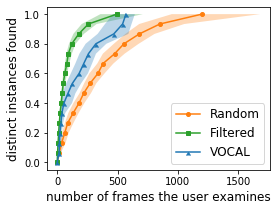

In [22]:
plot('iterative_without_heuristic.json', 'random_without_heuristic.json', 'filtered_without_heuristic.json', "without_heuristic.pdf")

In [20]:
print(ip_y_median[9], ip_y_median[-1])
print(rp_y_median[9], rp_y_median[-1])
print(fp_y_median[9], fp_y_median[-1])
print("Finding 60% distinct instances:", rp_y_median[9]/ip_y_median[9], fp_y_median[9]/ip_y_median[9])
print("Finding all distinct instances:", rp_y_median[-1]/ip_y_median[-1], fp_y_median[-1]/ip_y_median[-1])
print(rp_y_upper[-1])

181.5 569.5
337.5 1199.5
63.0 494.5
Finding 60% distinct instances: 1.859504132231405 0.34710743801652894
Finding all distinct instances: 2.106233538191396 0.8683055311676909
1682.0


1147.5 3536.5


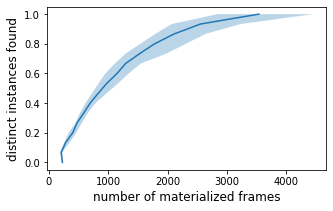

In [17]:
with open('../outputs/baseline_materialized.json', 'r') as f:
    materialized_y_list = json.loads(f.read())

materialized_y = np.asarray(materialized_y_list)
materialized_y_upper = np.percentile(materialized_y, 75, axis=0)
materialized_y_lower = np.percentile(materialized_y, 25, axis=0)
materialized_y_median = np.percentile(materialized_y, 50, axis=0)
materialized_x_values = np.arange(materialized_y.shape[1]) / 15

# plot it!
fig, ax = plt.subplots(1, figsize=(5, 3))

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(10)

ax.plot(materialized_y_median, materialized_x_values, label='Iterative', color='tab:blue')
ax.fill_betweenx(materialized_x_values, materialized_y_lower, materialized_y_upper, facecolor='tab:blue', alpha=0.3)
# ax.legend(loc='lower right', prop={"size":12})
ax.set_xlabel('number of materialized frames', fontsize=12)
ax.set_ylabel('distinct instances found', fontsize=12)
# plt.xticks(np.arange(0, 1501, 250))
# plt.xlim(right=1700)
# plt.savefig("with_heuristic.pdf", bbox_inches='tight', pad_inches=0)
print(materialized_y_median[9], materialized_y_median[-1])

35.0 78.0
42.0 89.5


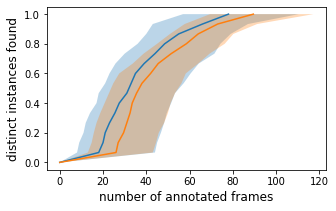

In [2]:
with open('../outputs/baseline_annotated.json', 'r') as f:
    annotated_y_list = json.loads(f.read())
with open('../outputs/baseline_annotated_exsample.json', 'r') as f:
    annotated_exsample_y_list = json.loads(f.read())

annotated_y = []
for plot_data_y in annotated_y_list:
    current = 0
    num_frames_as_y = [0]
    for i, y in enumerate(plot_data_y): 
        if y > current: 
            num_frames_as_y.append(i)
            current = y
    annotated_y.append(num_frames_as_y)
annotated_y = np.asarray(annotated_y)
annotated_y_upper = np.percentile(annotated_y, 75, axis=0)
annotated_y_lower = np.percentile(annotated_y, 25, axis=0)
annotated_y_median = np.percentile(annotated_y, 50, axis=0)
annotated_x_values = np.arange(annotated_y.shape[1]) / 15

annotated_exsample_y = []
for plot_data_y in annotated_exsample_y_list:
    current = 0
    num_frames_as_y = [0]
    for i, y in enumerate(plot_data_y): 
        if y > current: 
            num_frames_as_y.append(i)
            current = y
    annotated_exsample_y.append(num_frames_as_y)
annotated_exsample_y = np.asarray(annotated_exsample_y)
annotated_exsample_y_upper = np.percentile(annotated_exsample_y, 75, axis=0)
annotated_exsample_y_lower = np.percentile(annotated_exsample_y, 25, axis=0)
annotated_exsample_y_median = np.percentile(annotated_exsample_y, 50, axis=0)
annotated_exsample_x_values = np.arange(annotated_exsample_y.shape[1]) / 15

# plot it!
fig, ax = plt.subplots(1, figsize=(5, 3))

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(10)

ax.plot(annotated_y_median, annotated_x_values, label='Iterative', color='tab:blue')
ax.fill_betweenx(annotated_x_values, annotated_y_lower, annotated_y_upper, facecolor='tab:blue', alpha=0.3)
ax.plot(annotated_exsample_y_median, annotated_exsample_x_values, label='Iterative', color='tab:orange')
ax.fill_betweenx(annotated_exsample_x_values, annotated_exsample_y_lower, annotated_exsample_y_upper, facecolor='tab:orange', alpha=0.3)
ax.legend(loc='lower right', prop={"size":12})
ax.set_xlabel('number of annotated frames', fontsize=12)
ax.set_ylabel('distinct instances found', fontsize=12)
# plt.xticks(np.arange(0, 1501, 250))
# plt.xlim(right=1700)
print(annotated_y_median[9], annotated_y_median[-1])
print(annotated_exsample_y_median[9], annotated_exsample_y_median[-1])

84.5 392.5
56.5 189.5


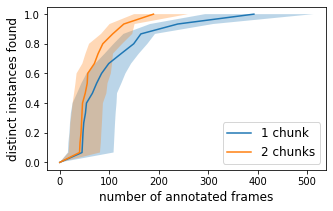

In [7]:
with open('../outputs/baseline_annotated_skewed.json', 'r') as f:
    annotated_y_list = json.loads(f.read())
with open('../outputs/baseline_annotated_exsample_skewed.json', 'r') as f:
    annotated_exsample_y_list = json.loads(f.read())

annotated_y = []
for plot_data_y in annotated_y_list:
    current = 0
    num_frames_as_y = [0]
    for i, y in enumerate(plot_data_y): 
        if y > current: 
            num_frames_as_y.append(i)
            current = y
    annotated_y.append(num_frames_as_y)
annotated_y = np.asarray(annotated_y)
annotated_y_upper = np.percentile(annotated_y, 75, axis=0)
annotated_y_lower = np.percentile(annotated_y, 25, axis=0)
annotated_y_median = np.percentile(annotated_y, 50, axis=0)
annotated_x_values = np.arange(annotated_y.shape[1]) / 15

annotated_exsample_y = []
for plot_data_y in annotated_exsample_y_list:
    current = 0
    num_frames_as_y = [0]
    for i, y in enumerate(plot_data_y): 
        if y > current: 
            num_frames_as_y.append(i)
            current = y
    annotated_exsample_y.append(num_frames_as_y)
annotated_exsample_y = np.asarray(annotated_exsample_y)
annotated_exsample_y_upper = np.percentile(annotated_exsample_y, 75, axis=0)
annotated_exsample_y_lower = np.percentile(annotated_exsample_y, 25, axis=0)
annotated_exsample_y_median = np.percentile(annotated_exsample_y, 50, axis=0)
annotated_exsample_x_values = np.arange(annotated_exsample_y.shape[1]) / 15

# plot it!
fig, ax = plt.subplots(1, figsize=(5, 3))

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(10)

ax.plot(annotated_y_median, annotated_x_values, label='1 chunk', color='tab:blue')
ax.fill_betweenx(annotated_x_values, annotated_y_lower, annotated_y_upper, facecolor='tab:blue', alpha=0.3)
ax.plot(annotated_exsample_y_median, annotated_exsample_x_values, label='2 chunks', color='tab:orange')
ax.fill_betweenx(annotated_exsample_x_values, annotated_exsample_y_lower, annotated_exsample_y_upper, facecolor='tab:orange', alpha=0.3)
ax.legend(loc='lower right', prop={"size":12})
ax.set_xlabel('number of annotated frames', fontsize=12)
ax.set_ylabel('distinct instances found', fontsize=12)
# plt.xticks(np.arange(0, 1501, 250))
# plt.xlim(right=1700)
print(annotated_y_median[9], annotated_y_median[-1])
print(annotated_exsample_y_median[9], annotated_exsample_y_median[-1])

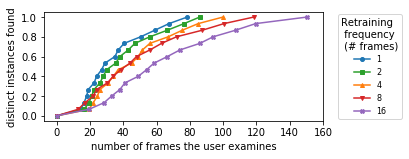

In [48]:
from matplotlib import rcParams
import itertools
clist = rcParams['axes.prop_cycle']
cgen = itertools.cycle(clist)

root_dir = "/home/ubuntu/complex_event_video/src/tests/retraining_freq"
fig, ax = plt.subplots(1, figsize=(5, 2))

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)

legend_items = []
markers = ["o", "^", "s", "v", "X"]
marker_idx = 0
for filename in os.listdir(root_dir):
    if not filename.endswith(".json"):
        continue
    parsed = filename.strip(".json")
    with open(os.path.join(root_dir, filename), 'r') as f:
        iterative_y_list = json.loads(f.read())

    ip_y = []
    for plot_data_y in iterative_y_list:
        current = 0
        num_frames_as_y = [0]
        for i, y in enumerate(plot_data_y):
            if y > current:
                num_frames_as_y.append(i)
                current = y
        ip_y.append(num_frames_as_y)
    ip_y = np.asarray(ip_y)
    ip_y_upper = np.percentile(ip_y, 75, axis=0)
    ip_y_lower = np.percentile(ip_y, 25, axis=0)
    ip_y_mean = np.percentile(ip_y, 50, axis=0)
    ip_x_values = np.arange(ip_y.shape[1]) / 15
    color = next(cgen)["color"]
    line, = ax.plot(ip_y_mean, ip_x_values, label=parsed, color=color, marker=markers[marker_idx], markersize=4)
    marker_idx += 1
    legend_items.append((int(parsed), line))
    # ax.fill_betweenx(ip_x_values, ip_y_lower, ip_y_upper, facecolor=color, alpha=0.2)
legend_items.sort()
ax.legend([x[1] for x in legend_items], [x[0] for x in legend_items], loc='center left', prop={"size":10}, bbox_to_anchor=(1.04, 0.5), title="Retraining\n frequency\n (# frames)", title_fontsize=10)
ax.set_xlabel('number of frames the user examines', fontsize=10)
ax.set_ylabel('distinct instances found', fontsize=10)
# plt.ylim(top=1.05)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.xticks(np.arange(0, 170, 20))
# ax.grid()
plt.savefig(os.path.join(root_dir, "retraining_freq.pdf"), bbox_inches='tight', pad_inches=0)


1177.0
2426.0
2426.0


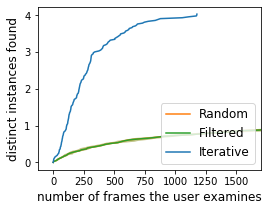

In [2]:
"""
test a
"""
with open('/home/ubuntu/complex_event_video/src/outputs/iterative_test_b.json', 'r') as f:
    iterative_y_list = json.loads(f.read())
with open('/home/ubuntu/complex_event_video/src/outputs/filtered_test_a.json', 'r') as f:
    random_y_list = json.loads(f.read())
with open('/home/ubuntu/complex_event_video/src/outputs/filtered_test_a.json', 'r') as f:
    filtered_y_list = json.loads(f.read())

ip_y = []
for plot_data_y in iterative_y_list:
    current = 0
    num_frames_as_y = [0]
    for i, y in enumerate(plot_data_y): 
        if y > current: 
            num_frames_as_y.append(i)
            current = y
    ip_y.append(num_frames_as_y)
ip_y = np.asarray(ip_y)
ip_y_upper = np.percentile(ip_y, 75, axis=0)
ip_y_lower = np.percentile(ip_y, 25, axis=0)
ip_y_median = np.percentile(ip_y, 50, axis=0)
ip_x_values = np.arange(ip_y.shape[1]) / 41

rp_y = []
for plot_data_y in random_y_list:
    current = 0
    num_frames_as_y = [0]
    for i, y in enumerate(plot_data_y): 
        if y > current: 
            num_frames_as_y.append(i)
            current = y
    rp_y.append(num_frames_as_y)
rp_y = np.asarray(rp_y)
rp_y_upper = np.percentile(rp_y, 75, axis=0)
rp_y_lower = np.percentile(rp_y, 25, axis=0)
rp_y_median = np.percentile(rp_y, 50, axis=0)
rp_x_values = np.arange(rp_y.shape[1]) / 41

fp_y = []
for plot_data_y in filtered_y_list:
    current = 0
    num_frames_as_y = [0]
    for i, y in enumerate(plot_data_y): 
        if y > current: 
            num_frames_as_y.append(i)
            current = y
    fp_y.append(num_frames_as_y)
fp_y = np.asarray(fp_y)
fp_y_upper = np.percentile(fp_y, 75, axis=0)
fp_y_lower = np.percentile(fp_y, 25, axis=0)
fp_y_median = np.percentile(fp_y, 50, axis=0)
rp_roi_x_values = np.arange(fp_y.shape[1]) / 41

# plot it!
fig, ax = plt.subplots(1, figsize=(4, 3))

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(10)


ax.plot(rp_y_median, rp_x_values, label='Random', color='tab:orange')
ax.plot(fp_y_median, rp_roi_x_values, label='Filtered', color='tab:green')
ax.plot(ip_y_median, ip_x_values, label='Iterative', color='tab:blue')
ax.fill_betweenx(rp_x_values, rp_y_lower, rp_y_upper, facecolor='tab:orange', alpha=0.3)
ax.fill_betweenx(rp_roi_x_values, fp_y_lower, fp_y_upper, facecolor='tab:green', alpha=0.3)
ax.fill_betweenx(ip_x_values, ip_y_lower, ip_y_upper, facecolor='tab:blue', alpha=0.3)
ax.legend(loc='lower right', prop={"size":12})
ax.set_xlabel('number of frames the user examines', fontsize=12)
ax.set_ylabel('distinct instances found', fontsize=12)
plt.xticks(np.arange(0, 1501, 250))
plt.xlim(right=1700)
# ax.grid()
# ax.set_rasterized(True)
# plt.savefig("with_heuristic.pdf", bbox_inches='tight', pad_inches=0)
print(ip_y_median[-1])
print(rp_y_median[-1])
print(fp_y_median[-1])

57.0 90.5
464.5 4463.0
402.0 3746.0
Finding 50% distinct instances: 8.149122807017545 7.052631578947368
Finding all distinct instances: 49.31491712707182 41.392265193370164


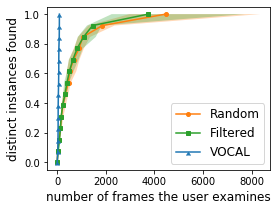

In [23]:
plot("../outputs/meva_person_enters_vehicle_VOCAL_with_heuristic.json", "../outputs/meva_person_enters_vehicle_random_with_heuristic.json", "../outputs/meva_person_enters_vehicle_filtered_with_heuristic.json", "../outputs/meva_person_enters_vehicle_with_heuristic.pdf")

138.0 596.5
599.5 3192.5
414.5 2147.0
Finding 50% distinct instances: 4.344202898550725 3.003623188405797
Finding all distinct instances: 5.3520536462699075 3.5993294216261527


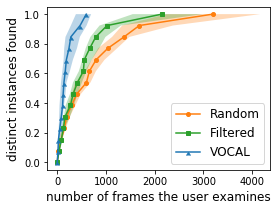

In [24]:
plot("../outputs/meva_person_enters_vehicle_VOCAL_without_heuristic.json", "../outputs/meva_person_enters_vehicle_random_without_heuristic.json", "../outputs/meva_person_enters_vehicle_filtered_without_heuristic.json", "../outputs/meva_person_enters_vehicle_without_heuristic.pdf")

589.0 2648.0
2271.5 21970.0
2165.5 21142.0
Finding 50% distinct instances: 3.8565365025466893 3.6765704584040746
Finding all distinct instances: 8.296827794561933 7.984138972809668


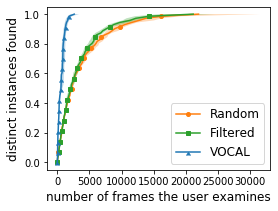

In [25]:
plot("../outputs/meva_person_stands_up_VOCAL_with_heuristic.json", "../outputs/meva_person_stands_up_random_with_heuristic.json", "../outputs/meva_person_stands_up_filtered_with_heuristic.json", "../outputs/meva_person_stands_up_with_heuristic.pdf", markevery=5)

2702.0 6492.0
2313.5 21286.0
2321.0 19664.0
Finding 50% distinct instances: 0.8562176165803109 0.8589933382679497
Finding all distinct instances: 3.278804682686383 3.028958718422674


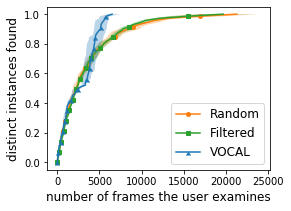

In [26]:
plot("../outputs/meva_person_stands_up_VOCAL_without_heuristic.json", "../outputs/meva_person_stands_up_random_without_heuristic.json", "../outputs/meva_person_stands_up_filtered_without_heuristic.json", "../outputs/meva_person_stands_up_without_heuristic.pdf", markevery=5)